In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
import pandas as pd
df = pd.read_csv(r"D:\SAM PROJECT PRIVATE\data\911.csv")
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [ ]:
df.isnull().sum()
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
if 'zip' in df.columns:
    df = df.drop('zip', axis=1)

df['twp'] = df['twp'].fillna('Unknown')
df.head()


,lat,lng,desc,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek  
df['DayOfWeek'] = df['DayOfWeek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})


In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts()


Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   title      663522 non-null  object        
 4   timeStamp  663522 non-null  datetime64[ns]
 5   twp        663522 non-null  object        
 6   addr       663522 non-null  object        
 7   e          663522 non-null  int64         
 8   Hour       663522 non-null  int32         
 9   Month      663522 non-null  int32         
 10  DayOfWeek  663522 non-null  object        
 11  Reason     663522 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 55.7+ MB


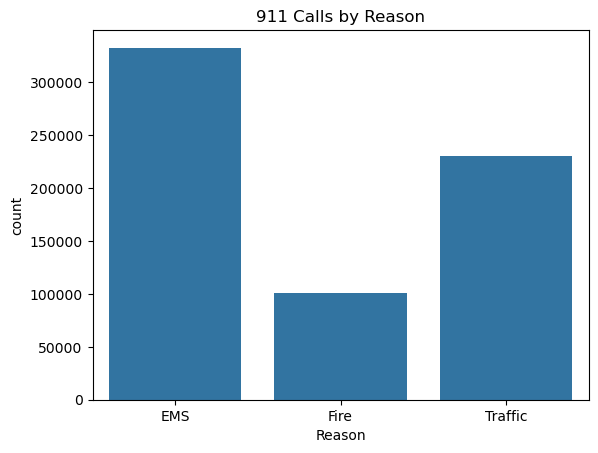

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Reason', data=df)
plt.title('911 Calls by Reason')
plt.show()


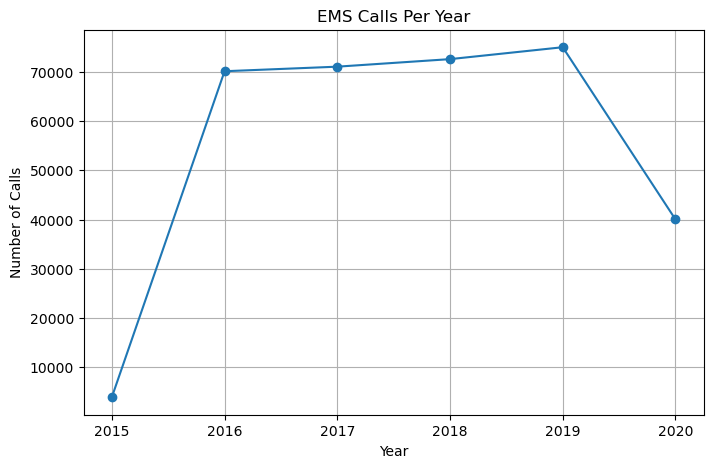

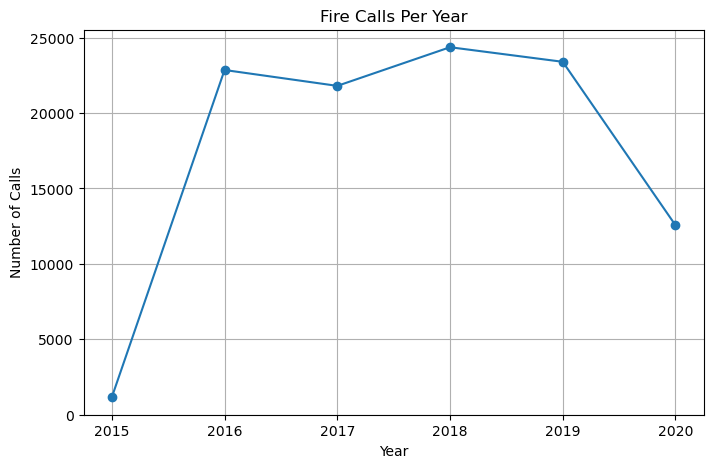

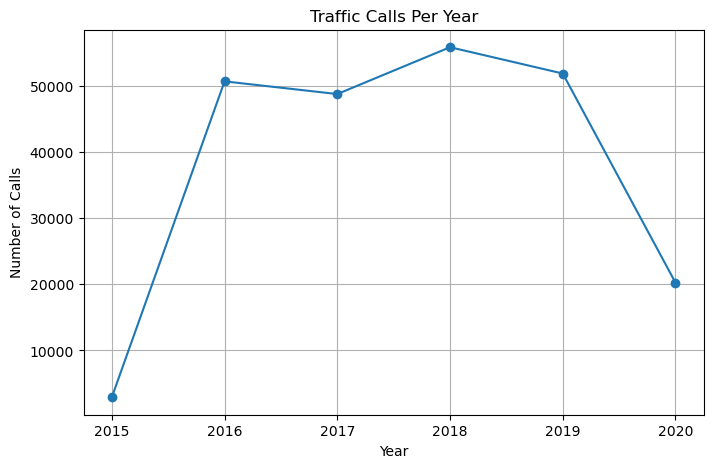

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Year'] = df['timeStamp'].dt.year

classes = ['EMS', 'Fire', 'Traffic']

for cls in classes:
    cls_df = df[df['title'].str.contains(cls, case=False)]
    yearly_counts = cls_df.groupby('Year').size()
    
    plt.figure(figsize=(8,5))
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label=cls)
    plt.title(f'{cls} Calls Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Calls')
    plt.grid(True)
    plt.show()



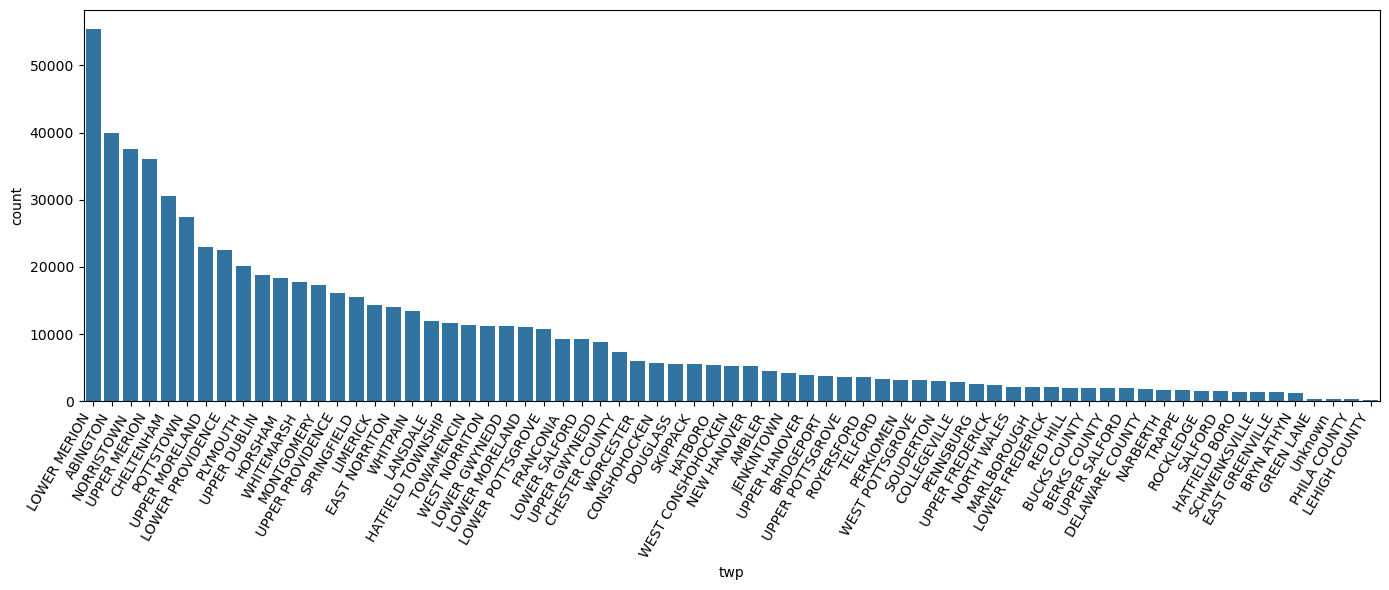

In [10]:
import seaborn as sns
plt.figure(figsize=(14,6)) 
sns.countplot(data=df, x='twp', order=df['twp'].value_counts().index)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()  
plt.show()


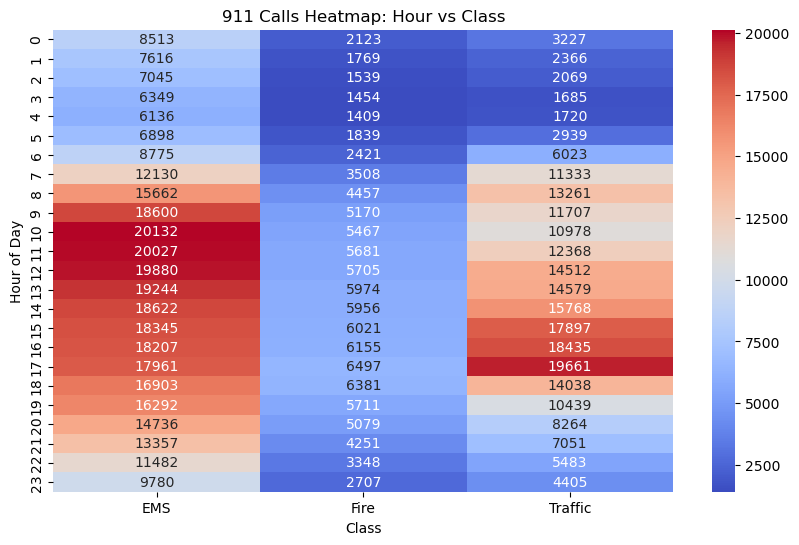

In [12]:
df['Hour'] = df['timeStamp'].dt.hour

heatmap_hour = df.pivot_table(index='Hour', columns='Class', aggfunc='size', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_hour, annot=True, fmt='d', cmap='coolwarm')
plt.title('911 Calls Heatmap: Hour vs Class')
plt.xlabel('Class')
plt.ylabel('Hour of Day')
plt.show()


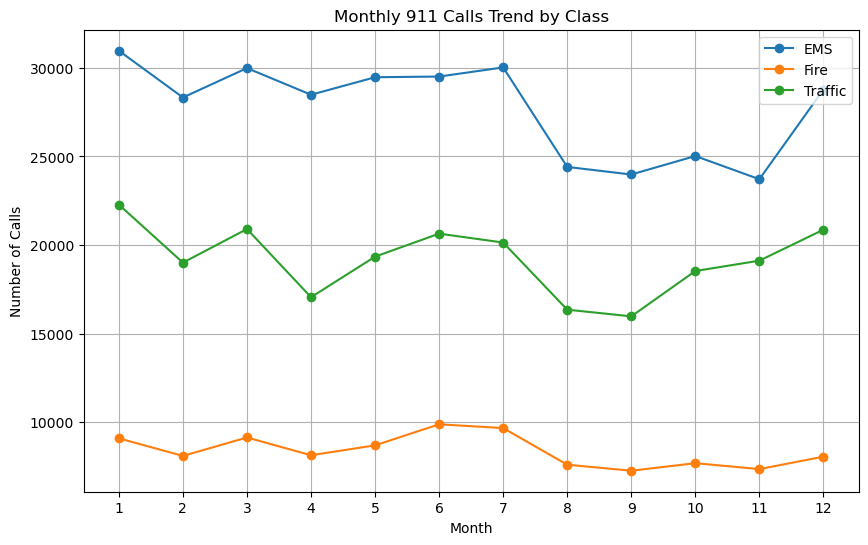

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Month'] = df['timeStamp'].dt.month
df['Class'] = df['title'].str.split(':').str[0]

classes = ['EMS', 'Fire', 'Traffic']

plt.figure(figsize=(10,6))
for cls in classes:
    cls_df = df[df['Class'] == cls]
    monthly_counts = cls_df.groupby('Month').size().sort_index()
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', label=cls)

plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Monthly 911 Calls Trend by Class')
plt.legend()
plt.grid(True)
plt.show()


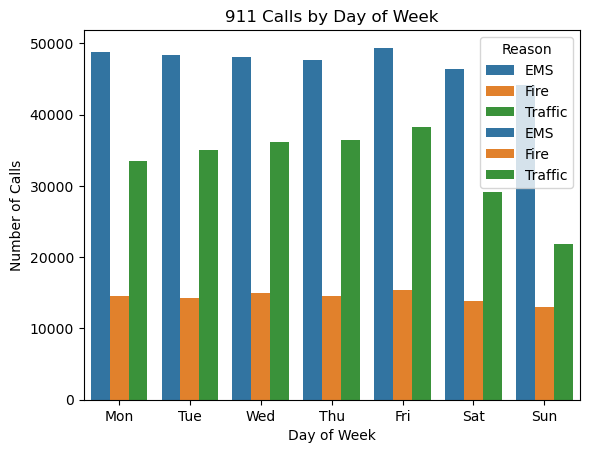

In [16]:
sns.countplot(
    x='DayOfWeek',
    data=df,
    order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    hue='Reason'
)
plt.xlabel("Day of Week")
plt.ylabel("Number of Calls")
plt.title("911 Calls by Day of Week")
plt.show()


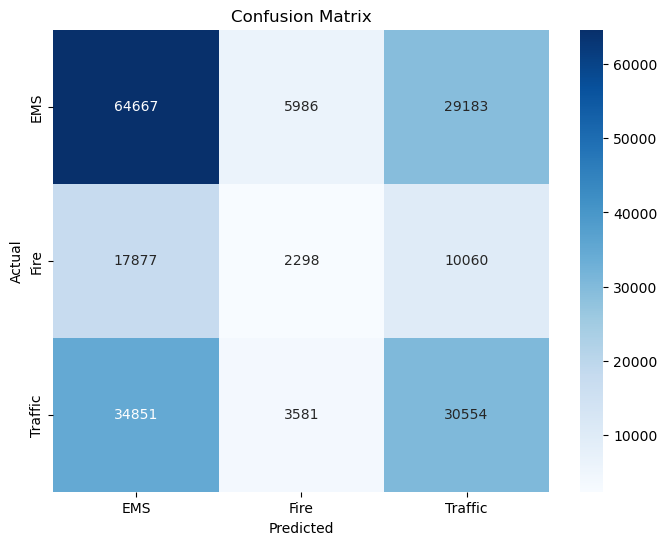

=== Classification Report ===
              precision    recall  f1-score   support

         EMS       0.55      0.65      0.60     99836
        Fire       0.19      0.08      0.11     30235
     Traffic       0.44      0.44      0.44     68986

    accuracy                           0.49    199057
   macro avg       0.39      0.39      0.38    199057
weighted avg       0.46      0.49      0.47    199057


=== Summary Scores ===
Accuracy: 0.4899
Precision (Macro): 0.3941
Precision (Weighted): 0.4574
Recall (Macro): 0.3889
Recall (Weighted): 0.4899
F1-score (Macro): 0.3816
F1-score (Weighted): 0.4678


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)


df = pd.read_csv(r"D:\SAM PROJECT PRIVATE\data\911.csv")

df['twp'] = df['twp'].fillna('Unknown')

if 'zip' in df.columns:
    df = df.drop('zip', axis=1)

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfWeek'] = df['timeStamp'].dt.dayofweek
df['DayOfWeek'] = df['DayOfWeek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])


X = pd.get_dummies(df[['Hour', 'Month', 'DayOfWeek', 'twp']], drop_first=True)
y = df['Reason']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)

precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)

f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Summary Scores ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1-score (Macro): {f1_macro:.4f}")
print(f"F1-score (Weighted): {f1_weighted:.4f}")
